# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Формат-даты" data-toc-modified-id="Формат-даты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Формат даты</a></span></li><li><span><a href="#Название-столбца" data-toc-modified-id="Название-столбца-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Название столбца</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#ceiling_height" data-toc-modified-id="ceiling_height-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span><code>ceiling_height</code></a></span></li><li><span><a href="#living_area" data-toc-modified-id="living_area-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span><code>living_area</code></a></span></li><li><span><a href="#is_apartment" data-toc-modified-id="is_apartment-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span><code>is_apartment</code></a></span></li><li><span><a href="#kitchen_area" data-toc-modified-id="kitchen_area-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span><code>kitchen_area</code></a></span></li><li><span><a href="#city_centers_nearest" data-toc-modified-id="city_centers_nearest-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span><code>city_centers_nearest</code></a></span></li></ul></li><li><span><a href="#Изменение-типа-столбцов" data-toc-modified-id="Изменение-типа-столбцов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изменение типа столбцов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Добавление-расчётов-в-таблицу" data-toc-modified-id="Добавление-расчётов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление расчётов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Цена-за-кв/м" data-toc-modified-id="Цена-за-кв/м-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена за кв/м</a></span></li><li><span><a href="#День-недели,-месяц,-год-публикации" data-toc-modified-id="День-недели,-месяц,-год-публикации-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели, месяц, год публикации</a></span></li><li><span><a href="#Категоризация-этажей" data-toc-modified-id="Категоризация-этажей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Категоризация этажей</a></span></li><li><span><a href="#Соотношение-жилой-и-кухонной-площади-к-общей." data-toc-modified-id="Соотношение-жилой-и-кухонной-площади-к-общей.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Соотношение жилой и кухонной площади к общей.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Параметры-высоты-потолков" data-toc-modified-id="Параметры-высоты-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Параметры высоты потолков</a></span></li><li><span><a href="#Параметры-количества-комнат" data-toc-modified-id="Параметры-количества-комнат-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Параметры количества комнат</a></span></li><li><span><a href="#Параметры-площади." data-toc-modified-id="Параметры-площади.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Параметры площади.</a></span></li><li><span><a href="#Параметры-цены." data-toc-modified-id="Параметры-цены.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Параметры цены.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Задания" data-toc-modified-id="Задания-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задания</a></span><ul class="toc-item"><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Время продажи квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Редкие-и-выбивающиеся-значения" data-toc-modified-id="Редкие-и-выбивающиеся-значения-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Редкие и выбивающиеся значения</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Цена-за-кв/м" data-toc-modified-id="Цена-за-кв/м-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Цена за кв/м</a></span></li><li><span><a href="#Кол-во-комнат" data-toc-modified-id="Кол-во-комнат-5.3.5"><span class="toc-item-num">5.3.5&nbsp;&nbsp;</span>Кол-во комнат</a></span></li><li><span><a href="#Этаж" data-toc-modified-id="Этаж-5.3.6"><span class="toc-item-num">5.3.6&nbsp;&nbsp;</span>Этаж</a></span></li><li><span><a href="#Удаленность-от-центра" data-toc-modified-id="Удаленность-от-центра-5.3.7"><span class="toc-item-num">5.3.7&nbsp;&nbsp;</span>Удаленность от центра</a></span></li><li><span><a href="#Дата-размещения" data-toc-modified-id="Дата-размещения-5.3.8"><span class="toc-item-num">5.3.8&nbsp;&nbsp;</span>Дата размещения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.3.9"><span class="toc-item-num">5.3.9&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#10-населенных-пунктов" data-toc-modified-id="10-населенных-пунктов-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>10 населенных пунктов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предложения-квартир" data-toc-modified-id="Предложения-квартир-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Предложения квартир</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Квартиры-в-центре" data-toc-modified-id="Квартиры-в-центре-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Квартиры в центре</a></span><ul class="toc-item"><li><span><a href="#Параметры-площади" data-toc-modified-id="Параметры-площади-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Параметры площади</a></span></li><li><span><a href="#Параметры-цены" data-toc-modified-id="Параметры-цены-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Параметры цены</a></span></li><li><span><a href="#Параметры-количества-комнат" data-toc-modified-id="Параметры-количества-комнат-5.6.3"><span class="toc-item-num">5.6.3&nbsp;&nbsp;</span>Параметры количества комнат</a></span></li><li><span><a href="#Параметры-высоты-потолков" data-toc-modified-id="Параметры-высоты-потолков-5.6.4"><span class="toc-item-num">5.6.4&nbsp;&nbsp;</span>Параметры высоты потолков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.6.5"><span class="toc-item-num">5.6.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Факторы,-влияющие-на-стоимость" data-toc-modified-id="Факторы,-влияющие-на-стоимость-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Факторы, влияющие на стоимость</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #табуляция
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Вывод

* В некоторых столбцах много пропущенных значений, нужно решить, как поступить с ними - качественно заменить, удалить эти данные или оставить всё как есть. 
* Также некоторые столбцы имеют вещественный тип данных, стоит заменить его на целочисленный, или тип object на булев. 
* В столбце `first_day_exposition` нужно поработать с датами и привести их в правильный формат.
* Столбец `cityCenters_nearest` стоит переименовать по правилам верблюжьего регистра.

## Предобработка данных

### Формат даты

In [4]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Название столбца

In [5]:
data=data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

### Обработка пропусков

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### `ceiling_height`

Значения столбца `ceiling_height` важны для исследования, но пропущенных значений очень много (около 38%), поэтому стоит их заменить медианой. Выведем уникальные значения этого столбца.

In [7]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Видим очень большой разброс в значениях, поэтому зададим стандарт — для этого построем гистограмму. Потом заменим пропуски на медианное значение и проверим, входит ли оно в этот стандарт.

<AxesSubplot:>

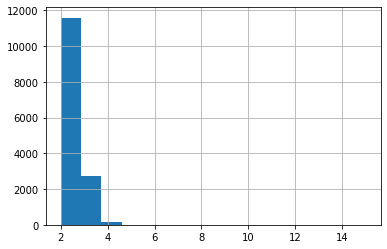

In [8]:
data['ceiling_height'].hist(bins=15, range=(2, 15))

Таким образом, видим, что стандартным зачением для этого столбца является диапазон от 2 до 3.5 метров. Проверяем медиану.

In [9]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Медианное значение - 2.65м, что входит в диапазон стандарта.

#### `living_area`

В столбце `living_area` также присутствуют пропуски, но заменить их просто медианой может быть ошибочно, т.к. в датафрейме преобладают 1-комнатные квартиры, а их площадь явно меньше, чем у остальных типов квартир. Разобьем квартиры на категории по комнатам.

Категоризация по комнатам: 1 — однокомнатные, 2 — двухкомнатные, 3 — трехкомнатные, 4 — четырехкомнатные, 5 — остальные.

In [10]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [11]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [12]:
def rooms_number(rooms): #создаем функцию для разбивки по категориям
    if rooms==1:
        return '1'
    elif rooms==2:
        return '2'
    elif rooms==3:
        return '3'
    elif rooms==4:
        return '4'
    elif rooms>=5:
        return '5'
    elif rooms==0:
        return '0'
data['rooms']=data['rooms'].apply(rooms_number) #переписываем значения столбца

In [13]:
try: data['rooms'] = data['rooms'].astype('int')
except: data['rooms'] = data['rooms']

In [14]:
data['rooms'].unique()

array([3, 1, 2, 4, 5, 0])

In [15]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
data.loc[data['open_plan']==True, 'living_area'] = 0 #если открытая планировка, то это значение должно быть нулевым

#### `is_apartment`

Нужно заменить пропущенные значения в `is_apartment` на False, т.к. скорее всего клиенты не заполнили это поле в силу того, что у них не апартаменты.

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Теперь нужно заменить тип данных на булев тип.

In [17]:
data['is_apartment'] = data['is_apartment'].astype('bool')

#### `kitchen_area`

Столбец `kitchen_area` тоже требует медианных значений вместо пропусков.

In [18]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))
data.loc[data['open_plan']==True, 'kitchen_area'] = 0 #если открытая планировка, то это значение должно быть нулевым

#### `city_centers_nearest`

Столбец `city_centers_nearest` важен для исследования, поэтому постараемся заполнить пропущенные значения.

In [19]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Есть смысл заменить ё на е, т.к. из-за различия в названиях появляются неявные дубликаты.

In [20]:
data['locality_name'] = data['locality_name'].str.replace("ё", "е")

Группируем значения по локации и заполняем пропуски медианой.

In [21]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest'].transform('median'))

Оставшиеся пропущенные значения удаляем, т.к. они будут мешать дальнейшему исследованию

### Изменение типа столбцов

In [22]:
data['last_price'] = data['last_price'].astype('int')

In [23]:
data['floors_total']=data['floors_total'].fillna(data['floor'])
data['floors_total'] = data['floors_total'].astype('int')

In [24]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              138
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     4872
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23561 non-null  float64       
 13  balcony         

### Вывод

Поработали с большим количеством пропусков, но некоторые не стали трогать в силу того, что эти данные не пригодятся при исследовании. Пропуски заполняли медианными значениями по категориям, чтобы исключить слишком больших или маленьких значений. Также поработали с форматом даты и названием столбца. Возможно, пропуски в данных появились из-за человеческого фактора - некоторые столбцы просто не были заполнены. Но вероятно, были и технические ошибки, такие как пропуски в данных о публикации объявления.

## Добавление расчётов в таблицу

### Цена за кв/м

In [26]:
data['price_square'] = (data['last_price'] / data['total_area']).round(1)

### День недели, месяц, год публикации

In [27]:
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

### Категоризация этажей

In [28]:
def floor_category(row):
   floor = row['floor']
   floors_total = row['floors_total']
   if floor == 1:
       return 'первый'
   elif floor == floors_total:
       return 'последний'
   else:
       return 'другой'
data['apartment_floor'] = data.apply(floor_category,axis = 1)

### Соотношение жилой и кухонной площади к общей.

In [29]:
data['total_and_living_ratio'] = data['total_area']/data['living_area']

In [30]:
data['total_and_kitchen_ratio'] = data['total_area']/data['kitchen_area']

In [31]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square,week_day,month,year,apartment_floor,total_and_living_ratio,total_and_kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.4,3,3,2019,другой,2.117647,4.320000
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82920.8,1,12,2018,первый,2.172043,3.672727
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92785.7,3,8,2015,другой,1.632653,6.746988
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3.0,234.0,424.0,408176.1,4,7,2015,другой,3.533333,16.736842
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.0,1,6,2018,другой,3.125000,2.439024


### Вывод

Были добавлены несколько столбцов, которые понадобятся при анализе данных. Также было решено немного 'разгрузить' таблицу, т.к. некоторые данные были использованы в новых столбцах.

## Исследовательский анализ данных

### Параметры высоты потолков

В предобработке данных я уже выводила гистограмму по высоте потолков и выяснила, что стандартным значением является диапазон от 2 до 3.5 метров. Перейдем к параметру числа комнат.

### Параметры количества комнат

<AxesSubplot:>

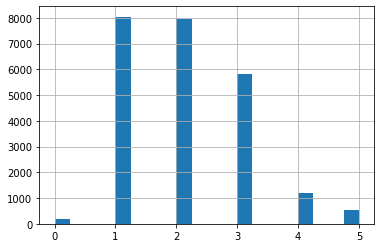

In [32]:
data['rooms'].hist(bins=20)

Видим, что преимущственно в данных присутствуют 1 и 2-комнатные квартиры, также существенную долю занимают 3-хкомнатые квартиры. Комнаты под категорией 5 вмещают в себя все помещения, в которых больше 4-х жилых комнат.

### Параметры площади.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

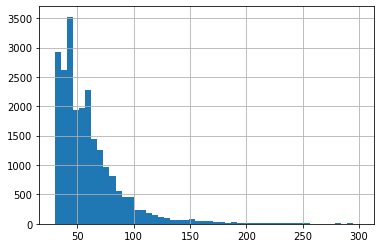

In [33]:
data['total_area'].hist(bins=50, range=(30, 300))
data['total_area'].describe()

По графику видим, что значения меньше 30 и больше 200 можно считать редкими.

### Параметры цены.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

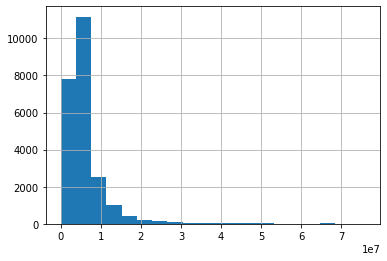

In [34]:
data['last_price'].hist(bins=20, range=(0, 76000000))
data['last_price'].describe()

In [35]:
data.sort_values(by='last_price', ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square,week_day,month,year,apartment_floor,total_and_living_ratio,total_and_kitchen_ratio
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0.0,NaN,8.0,111.8,2,3,2019,последний,3.406250,2.691358
17456,7,430000,30.4,2019-04-22,1,2.65,2,16.0,1,False,...,NaN,NaN,NaN,14144.7,0,4,2019,первый,1.900000,5.066667
14911,5,430000,54.0,2018-06-26,2,2.65,3,30.5,3,False,...,NaN,NaN,44.0,7963.0,1,6,2018,последний,1.770492,6.136364
16274,18,440000,40.0,2018-07-10,1,2.65,5,17.6,1,False,...,NaN,NaN,45.0,11000.0,1,7,2018,первый,2.272727,4.424779
17676,0,450000,36.5,2018-02-01,1,2.65,5,17.3,4,False,...,NaN,NaN,120.0,12328.8,3,2,2018,другой,2.109827,4.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000,618.0,2017-12-18,5,3.40,7,258.0,5,False,...,2.0,198.0,111.0,485436.9,0,12,2017,другой,2.395349,8.828571
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,3.0,285.0,233.0,1736842.1,2,4,2018,другой,2.000000,4.750000
14706,15,401300000,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,1.0,478.0,393.0,1000748.1,5,2,2016,последний,1.965686,16.708333
19540,8,420000000,900.0,2017-12-06,5,2.80,25,409.7,25,False,...,2.0,318.0,106.0,466666.7,2,12,2017,последний,2.196729,8.035714


Видим очень маленькое значение, эту строку можно будет удалить. В целом наблюдаем мало выбивающихся значений, не обязательно задавать параметр.

### Вывод

Таким образом, видим, что значения `ceiling_height`, `rooms`, `total_area` и `last_price` нуждаются в фильтрации.

## Задания

### Время продажи квартиры

<AxesSubplot:>

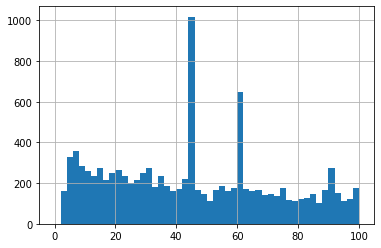

In [36]:
data['days_exposition'].hist(bins=50, range=(0,100))

In [37]:
data['days_exposition'].mean()

180.88863436982163

In [38]:
data['days_exposition'].median()

95.0

#### Вывод

По графику видно, что наибольшее кол-во продаж приходится на диапазон от 0 до 100 дней, что подтверждает и медиана. Среднее по этому столбцу в 2 раза больше, чем медиана, т.к. оно учитывает и слишком долгие продажи. В целом, долгими продажами можно считать диапазон от 200 дней.

### Редкие и выбивающиеся значения

Были найдены странные значения в следующих столбцах: `ceiling_height`, `rooms`, `total_area` и `last_price`. В `ceiling_height` нормальными значениями является диапазон от 2 до 3.5, в `total_area` - от 30 до 150, в `rooms` - от 1 до 4, в `last_price` стоит удалить строку с очень маленьким значением.

In [39]:
data = data.query('2<=ceiling_height<=3.5')
data = data.query('30<=total_area<=200')
data = data.query('1<=rooms<=5')
data = data[data['last_price'] != 12190]

### Факторы, влияющие на стоимость квартиры

#### Общая площадь

<AxesSubplot:xlabel='last_price'>

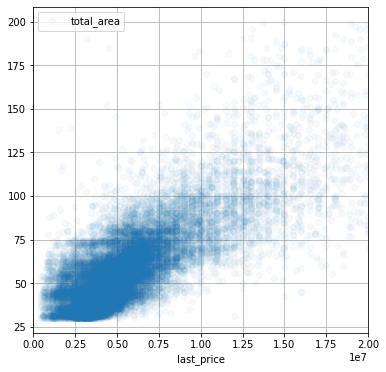

In [40]:
data.plot(x='last_price', y='total_area', style = 'o', xlim = (0, 20000000), grid = True, figsize=(6, 6), alpha=0.03)

По графику можно предположить, что цена зависит от площади - чем больше площадь, тем выше цена. Стоит проверить коэффицент Пирсона.

In [41]:
data['last_price'].corr(data['total_area'])

0.6553921424777042

Коэффицент корреляции выше среднего, но все же далек от единицы, стоит исследовать другие параметры.

#### Жилая площадь

<AxesSubplot:xlabel='last_price'>

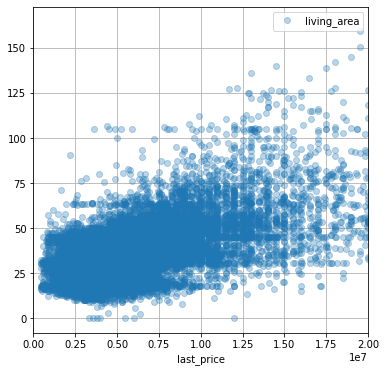

In [42]:
data.plot(x='last_price', y='living_area', style = 'o', xlim = (0, 20000000), grid = True, figsize=(6, 6), alpha=0.3)

In [43]:
data['last_price'].corr(data['living_area'])

0.5153154183659889

Хоть корреляцию здесь можно назвать средней, по графику видно, что бОльшая жилая площадь и стоит больше во многих случаях.

#### Площадь кухни

<AxesSubplot:xlabel='last_price'>

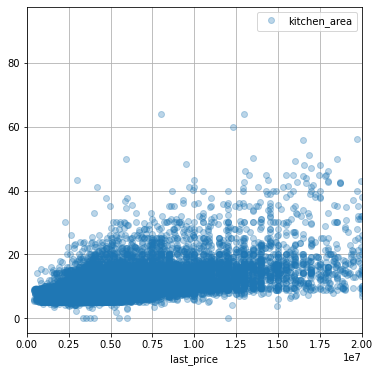

In [44]:
data.plot(x='last_price', y='kitchen_area', style = 'o', xlim = (0, 20000000), grid = True, figsize=(6, 6), alpha=0.3)

In [45]:
data['last_price'].corr(data['kitchen_area'])

0.49545897828843327

Если жилая площадь влияет на стоимость квартиры, то о кухонной площади вряд ли можно так сказать.

#### Цена за кв/м

<AxesSubplot:xlabel='last_price'>

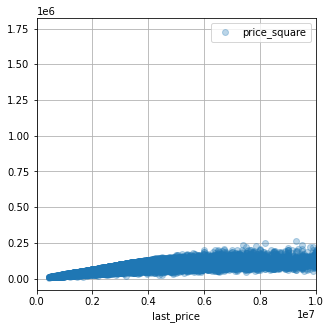

In [46]:
data.plot(x='last_price', y='price_square', style = 'o', xlim = (0, 10000000), grid = True, figsize=(5, 5), alpha=0.3)

In [47]:
data['last_price'].corr(data['price_square'])

0.8051455433826662

Видим, что корреляция по отношению к цене за квадратный метр довольно существенна.

#### Кол-во комнат

-0.1597437480763819

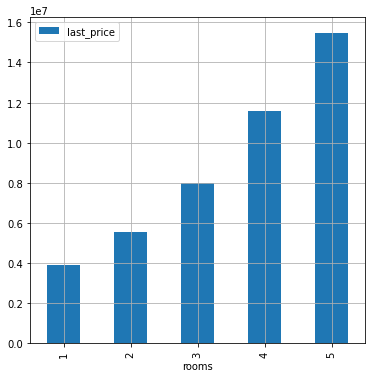

In [48]:
data_rooms = (
    data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
             ) #строим сводную таблицу для подсчета средней цены по кол-ву комнат
data_rooms.plot(y='last_price', kind='bar', grid=True, figsize=(6, 6))
data['rooms'].corr(data_rooms['last_price'])

Видим прямую зависимость роста цены и увеличивающегося кол-ва комнат.

#### Этаж

<AxesSubplot:xlabel='apartment_floor'>

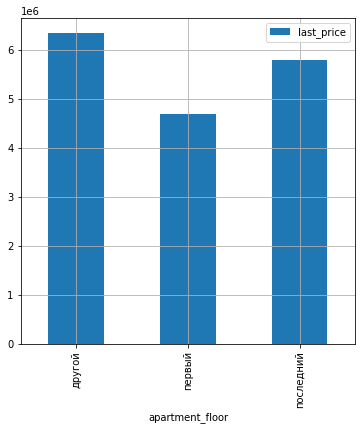

In [49]:
data_floor = (
    data.pivot_table(index='apartment_floor', values='last_price', aggfunc='mean')
             ) #строим сводную таблицу для подсчета средней цены по типу этажа
data_floor.plot(y='last_price', kind='bar', grid=True, figsize=(6, 6))

Можно сделать вывод, что квартиры на первом этаже в среднем дешевле, чем на остальных.

#### Удаленность от центра

-0.2795073604577887

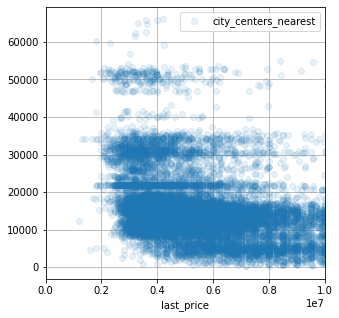

In [50]:
data.plot(x='last_price', y='city_centers_nearest', style = 'o', xlim = (0, 10000000), grid = True, figsize=(5, 5), alpha=0.1)
data['last_price'].corr(data['city_centers_nearest'])

Корреляция не очень высокая, но по графику заметно, что при удаленности от 2км от центра стоимость заметно падает.

#### Дата размещения

0.29045007837058473

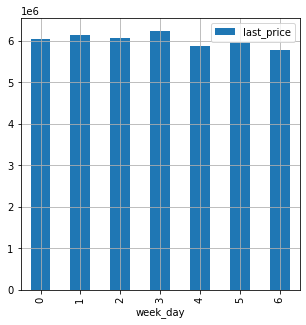

In [51]:
data_week_day = (
    data.pivot_table(index='week_day', values='last_price', aggfunc='mean')
             ) #строим сводную таблицу для подсчета средней цены по дню недели
data_week_day.plot(y='last_price', kind='bar', grid=True, figsize=(5, 5))
data['week_day'].corr(data_week_day['last_price'])

-0.5419635564785741

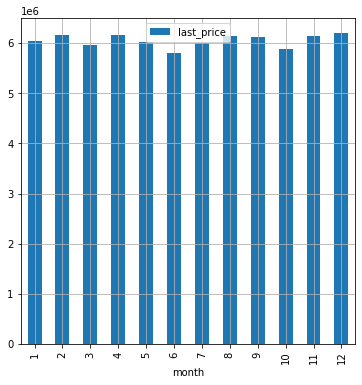

In [52]:
data_month = (
    data.pivot_table(index='month', values='last_price', aggfunc='mean')
             ) #строим сводную таблицу для подсчета средней цены по месяцам
data_month.plot(y='last_price', kind='bar', grid=True, figsize=(6, 6))
data['month'].corr(data_month['last_price'])

0.19120660184939067

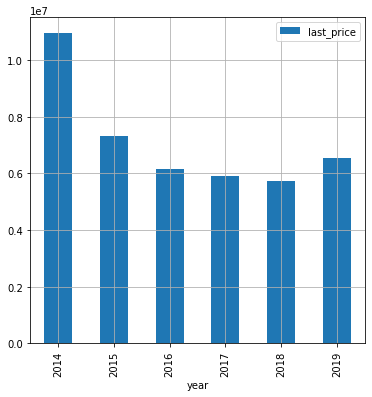

In [53]:
data_year = (
    data.pivot_table(index='year', values='last_price', aggfunc='mean')
             ) #строим сводную таблицу для подсчета средней цены по годам
data_year.plot(y='last_price', kind='bar', grid=True, figsize=(6, 6))
data['year'].corr(data_year['last_price'])

Единственным влияющим фактором является год размещения объявления - в 2014 цены были выше всего. Возможно, это связано с экономическими причинами, ведь в том году был кризис.

#### Вывод

Влияющими на цену факторами оказались: 
* площадь (в т.ч. жилая)
* цена за кв/м 
* кол-во комнат (чем больше комнат, тем выше цена)
* этаж (на первом дешевле)
* удаленность от центра (на расстоянии 2 км от центра цена начинает падать)
* год размещения объявления (в 2014 высокие цены)

Невлияющими факторами являются:
* площадь кухни
* день недели и месяц размещения публикации.

### 10 населенных пунктов

In [54]:
towns = data['locality_name'].value_counts().head(10)

In [55]:
top_towns = data.query('locality_name in @towns.index')
top_towns

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square,week_day,month,year,apartment_floor,total_and_living_ratio,total_and_kitchen_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.4,3,3,2019,другой,2.117647,4.320000
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82920.8,1,12,2018,первый,2.172043,3.672727
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92785.7,3,8,2015,другой,1.632653,6.746988
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.0,9,False,...,3.0,234.0,424.0,408176.1,4,7,2015,другой,3.533333,16.736842
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.0,1,6,2018,другой,3.125000,2.439024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.0,12,False,...,0.0,NaN,23.0,91089.1,0,4,2019,другой,1.603175,6.733333
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,False,...,2.0,652.0,29.0,100566.6,2,2,2018,другой,2.165644,3.879121
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.0,2,False,...,0.0,NaN,15.0,105769.2,3,7,2018,другой,1.677419,8.666667
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,1.0,806.0,519.0,129904.0,3,10,2016,другой,1.808933,6.877358


In [56]:
top_towns.groupby('locality_name')['price_square'].mean().sort_values(ascending=False)

locality_name
Санкт-Петербург      112869.367110
Пушкин               102485.364689
деревня Кудрово       91884.371429
поселок Парголово     90228.363208
поселок Мурино        84268.597495
поселок Шушары        77702.948700
Колпино               75176.606647
Гатчина               68854.435430
Всеволожск            68533.543896
Выборг                57892.188688
Name: price_square, dtype: float64

#### Вывод

В Санкт-Петербурге самая высокая стоимость жилья за квадратный метр, в Выборге - самая низкая.

### Предложения квартир

In [57]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round() #создаем столбец с округленным значением в км

In [58]:
try: data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int') 
except: data['city_centers_nearest_km'] = data['city_centers_nearest_km']

In [59]:
data_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
data_spb = data_spb.reset_index(drop=False) #из-за упоминания в сводной таблице нужно сбросить индексацию

<AxesSubplot:xlabel='last_price'>

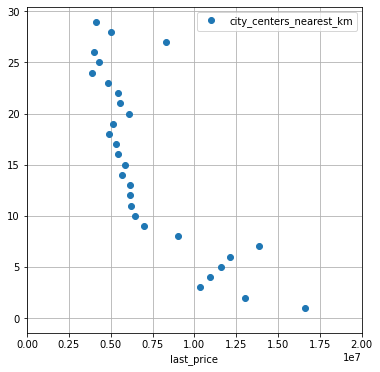

In [60]:
data_spb.plot(x = 'last_price', y = 'city_centers_nearest_km', style = 'o', xlim = (0, 20000000), grid = True, figsize=(6, 6))

После 7-го километра цена начинает резко уменьшаться, соотвестственно, центром можно считать область в 7 километрах от самого центра.

<AxesSubplot:xlabel='city_centers_nearest_km'>

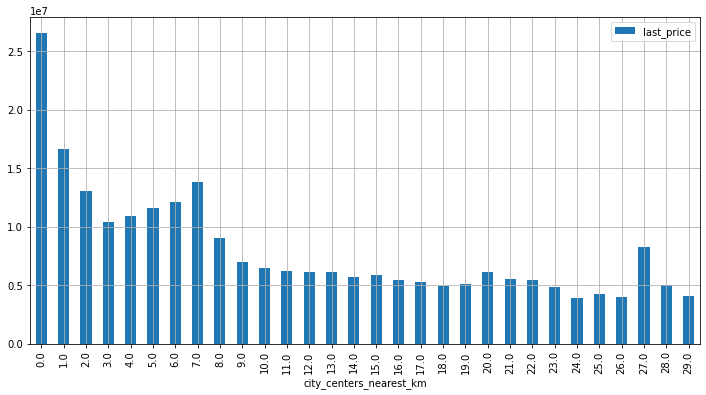

In [61]:
data_spb_km_mean = (
    data_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
            ) #считаем среднюю цену для каждого км
data_spb_km_mean.plot(kind='bar', y='last_price', grid=True, figsize=(12, 6)) #строим график

#### Вывод

Квартиры в самом центре Петербурга явно дороже, чем в остальных зонах. Центральной зоной является площадь до 7 км от центра.

### Квартиры в центре

#### Параметры площади

In [62]:
downtown_apartments = data.query('city_centers_nearest_km<=7')

count    3123.000000
mean       83.469232
std        36.049886
min        30.000000
25%        56.000000
50%        76.000000
75%       103.000000
max       200.000000
Name: total_area, dtype: float64

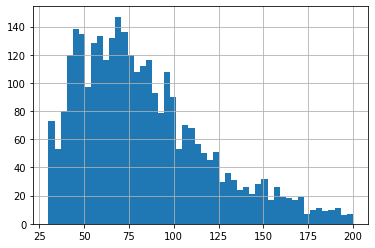

In [63]:
downtown_apartments['total_area'].hist(bins=50)
downtown_apartments['total_area'].describe()

Среди данных о квартирах в центре можно заметить, что здесь гораздо больший метраж, т.к. в общем анализе было мало квартир, у которых метраж превышал 75 м. Можно сделать вывод, что большинство квартир в центре имеют площадь до 120 кв.м.

#### Параметры цены

count    3.123000e+03
mean     1.217941e+07
std      1.282401e+07
min      1.600000e+06
25%      6.525000e+06
50%      8.900000e+06
75%      1.300000e+07
max      3.300000e+08
Name: last_price, dtype: float64

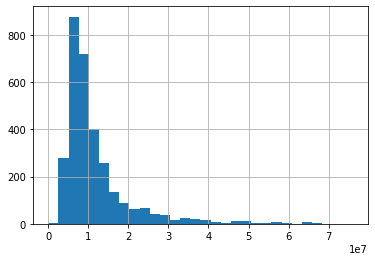

In [64]:
downtown_apartments['last_price'].hist(bins=30, range=(0, 76000000))
downtown_apartments['last_price'].describe()

Пиковое значение приходится на диапазон от 6 до 8 миллионов, также существенно много квартир от 8 до 10 миллионов стоимостью. В общем анализе данных пиковым значением можно назвать диапазон от 5 до 7 миллионов, дальше кол-во квартир падает.

#### Параметры количества комнат

count    3123.000000
mean        2.666346
std         1.102431
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

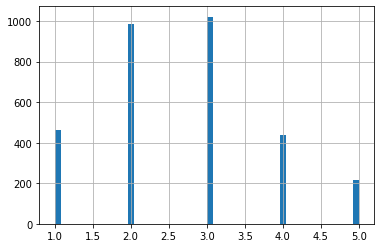

In [65]:
downtown_apartments['rooms'].hist(bins=50)
downtown_apartments['rooms'].describe()

Больше всего в центре Петеребурга 2-хкомнатных и 3-хкомнатных квартир, в то время как в целом по области преобладают 1-комнатные и 2-комнатные квартиры.

#### Параметры высоты потолков

count    3123.000000
mean        2.869949
std         0.267489
min         2.400000
25%         2.650000
50%         2.750000
75%         3.040000
max         3.500000
Name: ceiling_height, dtype: float64

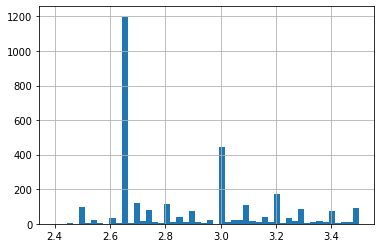

In [66]:
downtown_apartments['ceiling_height'].hist(bins=50)
downtown_apartments['ceiling_height'].describe()

Пиковым значением является 2.65м, т.к. мы заменяли пропуски на мединное значение. Но также значение 3м является очень распространенным, в отличие от общих выводов.

#### Вывод

Параметры изменились следующим образом: в центре площадь квартир в среднем больше, квартиры стоят дороже, здесь преобладают 2-хкомнатные и 3-хкомнатные квартиры и есть существенное кол-во квартир с 3-хметровыми потолками.

### Факторы, влияющие на стоимость

0.5492597447945958

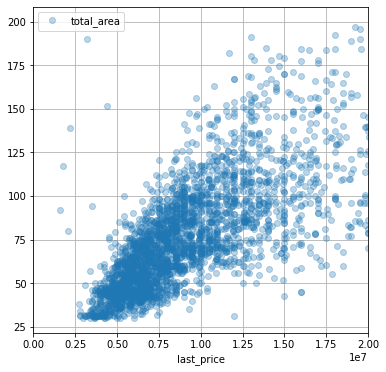

In [67]:
downtown_apartments.plot(x='last_price', y='total_area', style = 'o', xlim = (0, 20000000), grid = True, figsize=(6, 6), alpha=0.3)
data['total_area'].corr(downtown_apartments['last_price'])

Наблюдаем среднюю зависимость цены от метража.

0.3765205967169565

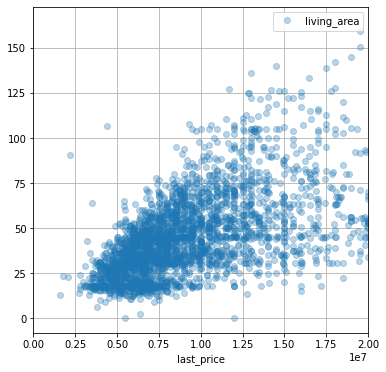

In [68]:
downtown_apartments.plot(x='last_price', y='living_area', style = 'o', xlim = (0, 20000000), grid = True, figsize=(6, 6), alpha=0.3)
data['living_area'].corr(downtown_apartments['last_price'])

Метраж жилой площади существенно не влияет на цену.

0.41758617605244663

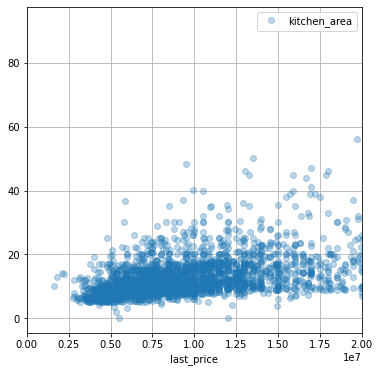

In [69]:
downtown_apartments.plot(x='last_price', y='kitchen_area', style = 'o', xlim = (0, 20000000), grid = True, figsize=(6, 6), alpha=0.3)
data['kitchen_area'].corr(downtown_apartments['last_price'])

Тоже самое можно сказать о кухонной площади.

0.18482612986293503

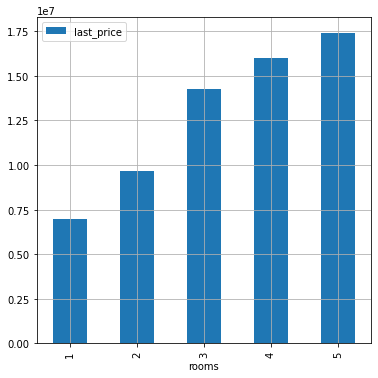

In [70]:
downtown_apartments_rooms = (
    downtown_apartments.pivot_table(index='rooms', values='last_price', aggfunc='mean')
             )
downtown_apartments_rooms.plot(y='last_price', kind='bar', grid=True, figsize=(6, 6))
data['rooms'].corr(downtown_apartments_rooms['last_price'])

<AxesSubplot:xlabel='apartment_floor'>

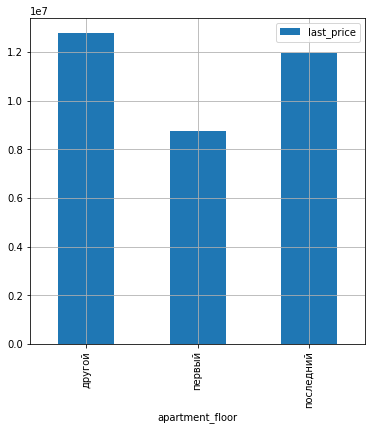

In [71]:
downtown_apartments_floor = (
    downtown_apartments.pivot_table(index='apartment_floor', values='last_price', aggfunc='mean')
             ) 
downtown_apartments_floor.plot(y='last_price', kind='bar', grid=True, figsize=(6, 6))

0.4626558307066814

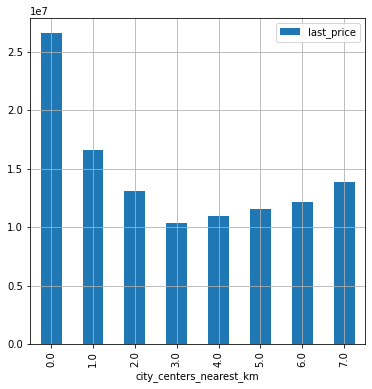

In [72]:
downtown_apartments_km = (
    downtown_apartments.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
             ) 
downtown_apartments_km.plot(y='last_price', kind='bar', grid=True, figsize=(6, 6))
data['city_centers_nearest_km'].corr(downtown_apartments_km['last_price'])

-0.16708259655134536

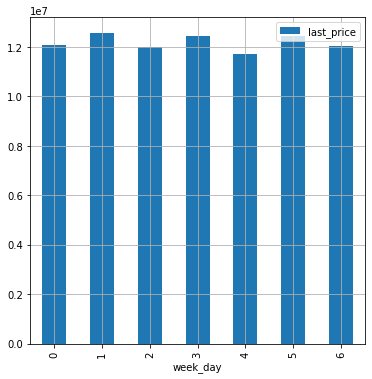

In [73]:
downtown_apartments_week_day = (
    downtown_apartments.pivot_table(index='week_day', values='last_price', aggfunc='mean')
             ) 
downtown_apartments_week_day.plot(y='last_price', kind='bar', grid=True, figsize=(6, 6))
data['week_day'].corr(downtown_apartments_week_day['last_price'])

-0.04365400275595811

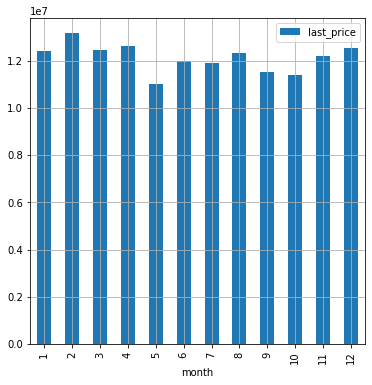

In [74]:
downtown_apartments_month = (
    downtown_apartments.pivot_table(index='month', values='last_price', aggfunc='mean')
             ) 
downtown_apartments_month.plot(y='last_price', kind='bar', grid=True, figsize=(6, 6))
data['month'].corr(downtown_apartments_month['last_price'])

0.3200234387045568

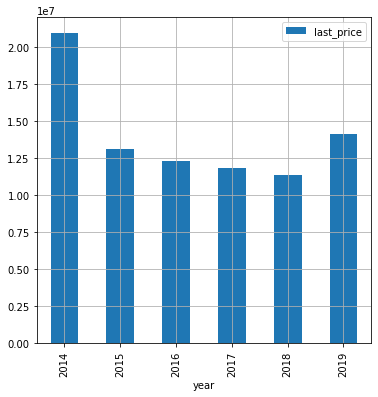

In [75]:
downtown_apartments_year = (
    downtown_apartments.pivot_table(index='year', values='last_price', aggfunc='mean')
             ) 
downtown_apartments_year.plot(y='last_price', kind='bar', grid=True, figsize=(6, 6))
data['year'].corr(downtown_apartments_year['last_price'])

#### Вывод

В этой категории квартир были выявлены следующие влияющие на стоимость факторы:
* площадь помещения (в т.ч. жилая)
* кол-во комнат (но 3 и 4-хкомнатные не сильно отличаются в стоимости)
* квартиры на первом этаже дешевле
* в самом центре квартиры существенно дороже
* в мае были публикации с самыми дешевыми предложениями
* в 2014 году наблюдались самые дорогие предложения
\

Невлияющие факторы:
* кухонная площадь
* день публикации

Эти выводы отличаются от общих тем, что 3 и 4-хкомнатные квартиры не сильно разнятся в цене, и в мае публикации были с более низкой стоимостью жилья. 

## Общий вывод

Таким образом, можно выделить следующие общие факторы, влияющие на стоимость жилья:
* общая площадь — цена растёт при большей площади. 
* цена за кв.м.
* кол-во комнат - рост цены при увеличении их кол-ва. Это подходит для данных по всей области, однако в центре разница между 3 и 4-хкомнатными квартирами не столь существенна.
* этаж помещения - на первом этаже дешевле.
* удаленность от центра - чем дальше, те дешевле.
* дата размещения - для обоих категорий 2014 год был самым дорогим, для квартир в центре май является самым 'дешевым' месяцем

Невлияющими для обеих категорий факторами являются:
* день недели публикации.

Также были выявлены следующие параметры:
* высота потолков - в целом нормальными значениями является диапазон от 2 до 3.5м.
* цена - по всей области пиковым диапазоном является цена от 5 до 7 миллионов, однако в центре это диапазон от 6 до 8 миллионов, и также большое кол-во помещений имеют стоимость от 8 до 10 миллионов.
* кол-во комнат - по области преобладают 1 и 2-хкомнатные квартиры, в центре - 2 и 3-хкомнатные.
* площадь. Её средние параметры: по всей области — до 75 кв.м., в центре — до 120 кв.м.